In [8]:
pip install openpyxl


     -------------------------------------- 250.0/250.0 KB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\leond\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [11]:
# Lendo os dados
Base_Dados = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')

# Verificando
Base_Dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [12]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [13]:
Base_Dados.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,2021-07-02 21:28:25.263158016,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
min,2021-01-04 00:00:00,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,2021-04-05 12:00:00,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,2021-07-02 00:00:00,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,2021-09-29 12:00:00,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,2021-12-30 00:00:00,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984
std,NaN,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316


In [14]:
# Series Temporais
Dados = Base_Dados.set_index('Data')

Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


Text(0, 0.5, 'Valor da ação (R$)')

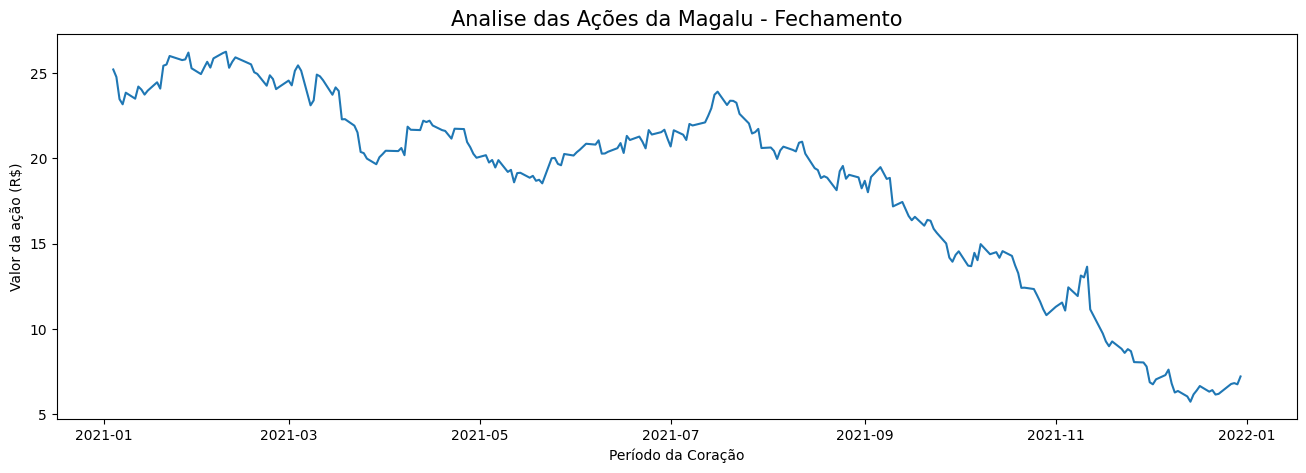

In [23]:
plt.figure(figsize=(16,5))
plt.title('Analise das Ações da Magalu - Fechamento', fontsize=15, loc="center")
plt.plot( Dados.index, Dados["Fechamento"])

plt.xlabel("Período da Coração")
plt.ylabel("Valor da ação (R$)")

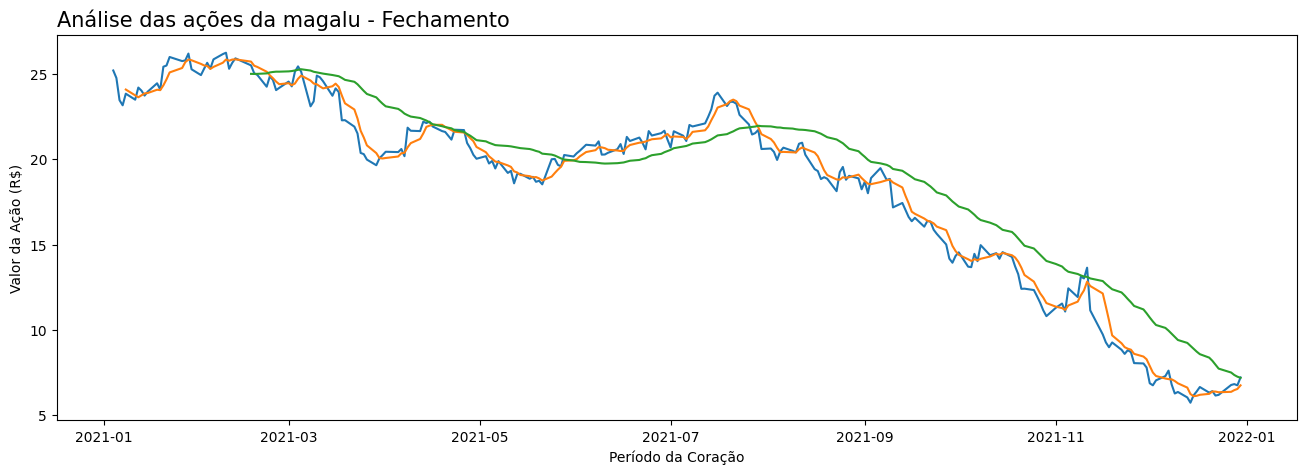

In [25]:
Media_Movel = Dados['Fechamento'].rolling(5).mean()
Media_Tendencia = Dados['Fechamento'].rolling(30).mean()

plt.figure( figsize=(16, 5) )
plt.title('Análise das ações da magalu - Fechamento', fontsize=15, loc='left')

plt.plot( Dados.index, Dados['Fechamento'] )
plt.plot( Dados.index, Media_Movel )
plt.plot( Dados.index, Media_Tendencia )

plt.xlabel('Período da Coração')
plt.ylabel('Valor da Ação (R$)');

<Axes: xlabel='Fechamento'>

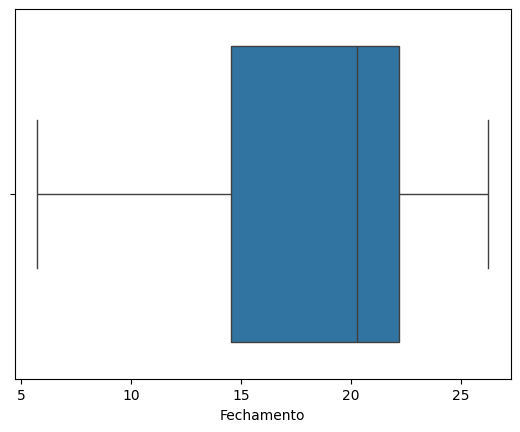

In [26]:
sns.boxplot( data=Dados, x='Fechamento')

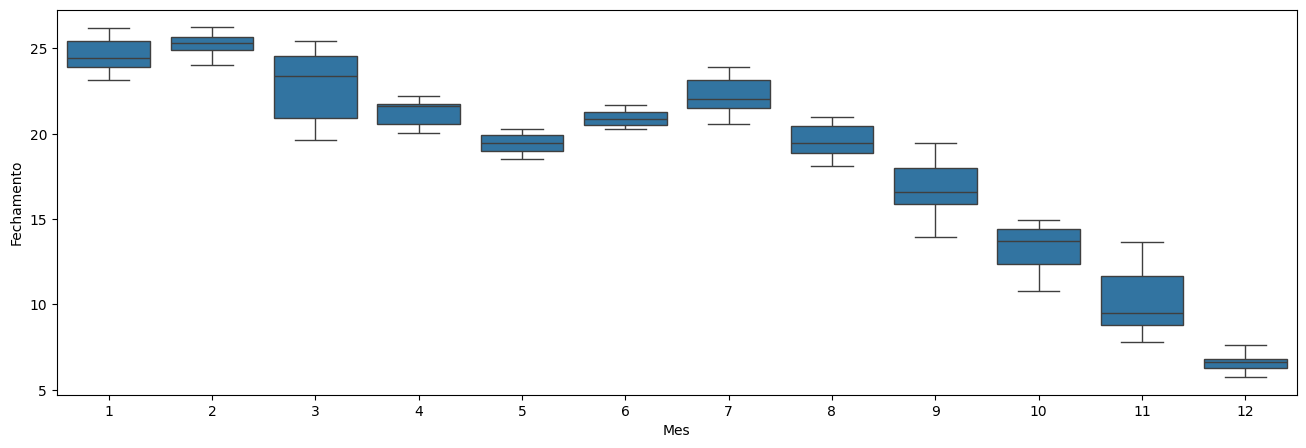

In [29]:
# Boxplot Mensal 

Base_Dados['Mes'] = Base_Dados['Data'].dt.month

plt.figure( figsize=(16, 5) )
sns.boxplot( data=Base_Dados, x='Mes', y='Fechamento' );